CARICO LE LIBRERIE GENERALI

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from statsmodels.tsa.stattools import adfuller, kpss


ESERCIZIO 1 DC2

In [4]:
import yfinance as yf ## for finance
import pandas as pd ## dataframes
import datetime as dt
import numpy as np ## linear algebra
np.random.seed(11) ## for reproducibility
import matplotlib.pyplot as plt
from scipy import stats ## main python statistical package
import warnings
warnings.filterwarnings("ignore")

In [5]:

start = dt.datetime(2021, 1, 1)
end = dt.datetime(2023, 1, 1)
SeP500 = yf.download('^GSPC', start, end)
IUHC = yf.download('IUHC.L', start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
SeP500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5015000000
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4591020000
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6064110000
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5099160000
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4773040000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


r= 0.00014842894665074088 sigma= 0.012251942676751504


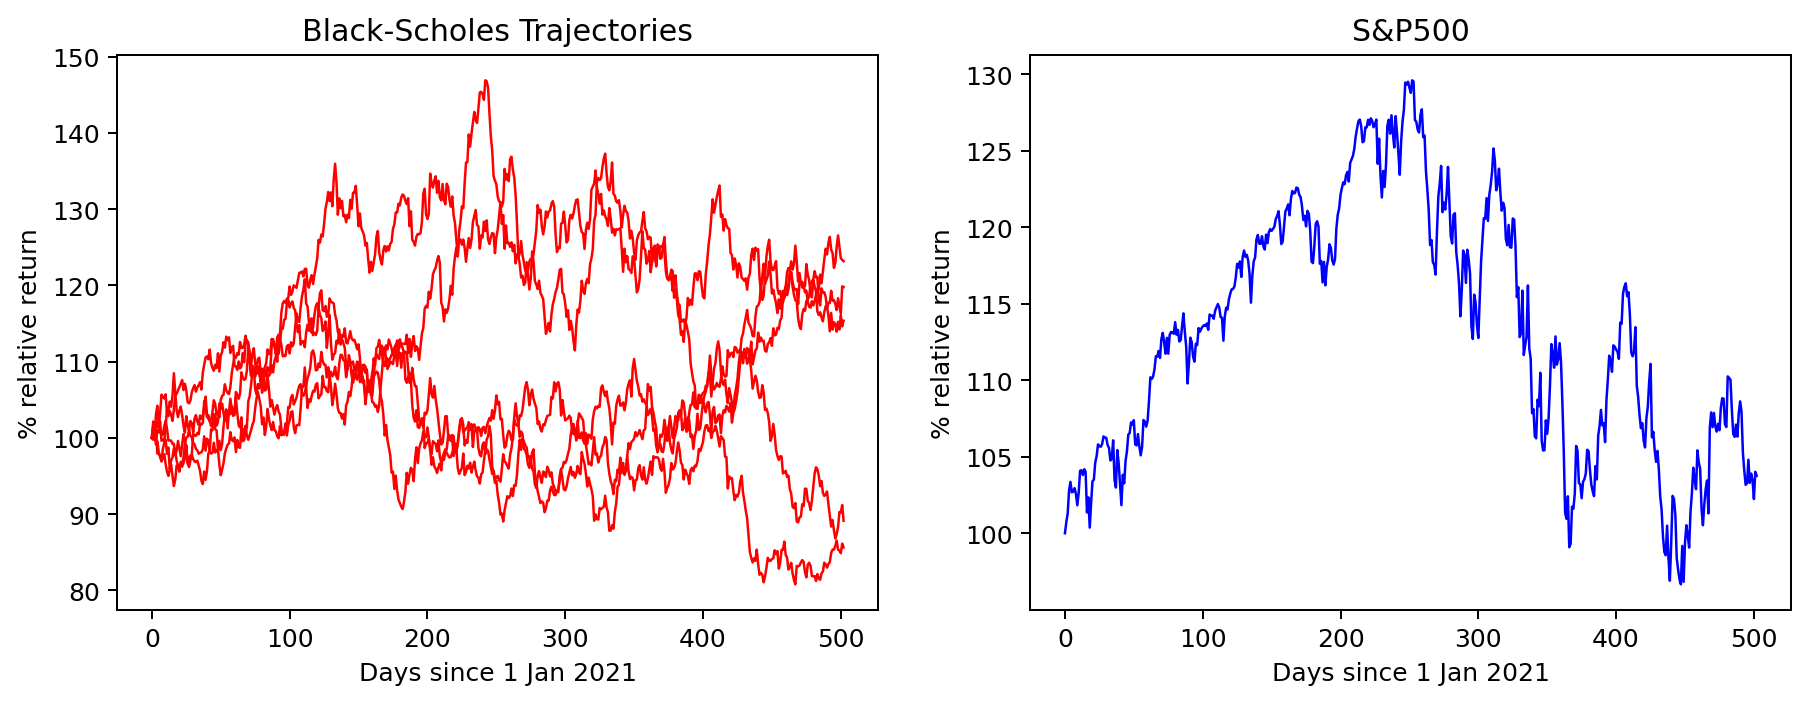

In [7]:
sep500 = SeP500['Adj Close']

## Estimate parameters
## to compute the parameters we exploit the fact that the logarithmic increments are randomly 
## distributed dlogS = log S_t+dt - log S_t ~ N(rdt - sigma^2/2dt, sigma^2dt)
LOGsep500 = np.log(sep500)
DLOGsep500 = [(LOGsep500[i+1]-LOGsep500[i]) for i in range(len(LOGsep500)-1)]
sigma = np.std(DLOGsep500) ## volatility
r = np.mean(DLOGsep500)+0.5*sigma*sigma ## risk free interest rate
print('r=', r, 'sigma=', sigma)
X0 = sep500[0]
Delta_t = 1 ## days
T_in = 0 
T_fin = len(sep500) ## 1 year exploration
Nsteps = int((T_fin-T_in)/Delta_t)
t = np.arange(T_in, T_fin, Delta_t)
NR = 5 ## number of realizations
X_t =[]
for nr in range(NR):
    X_t_R = []
    X_t_R.append(X0)
    for step_i in range(Nsteps):
        if step_i==0:
            pass
        else:
            add_value = X_t_R[-1]*(1+r*Delta_t+sigma*np.sqrt(Delta_t)*np.random.normal(0, 1))
            X_t_R.append(add_value)
    X_t.append(X_t_R)

plt.figure(figsize=(12, 4), dpi=180)
plt.subplot(1, 2, 1);
plt.title('Black-Scholes Trajectories')
for rlz in range(NR):
    plt.plot(t, X_t[rlz]/X_t[rlz][0]*100, color='r', lw=1)
plt.xlabel('Days since 1 Jan 2021'), plt.ylabel('% relative return')
plt.subplot(1, 2, 2);
plt.title('S&P500')
plt.plot(t, SeP500['Adj Close']/SeP500['Adj Close'][0]*100, lw=1,color='b', label='S&P500')
plt.xlabel('Days since 1 Jan 2021'), plt.ylabel('% relative return')
plt.show()

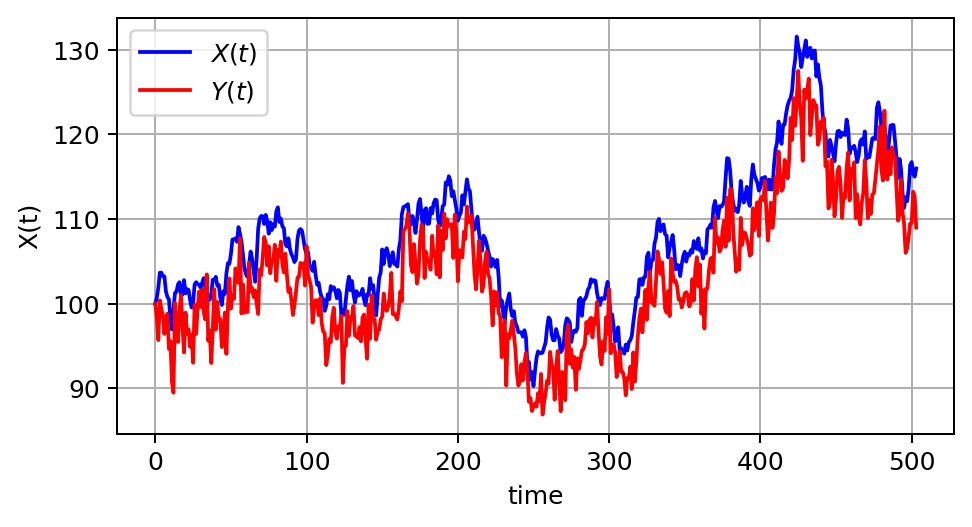

In [8]:
import numpy as np
X0 = sep500[0]
Y0= IUHC['Adj Close'][0]

Delta_t = 1 ## days
T_in = 0 
T_fin = len(sep500) ## 1 year exploration
Nsteps = int((T_fin-T_in)/Delta_t)
t = np.arange(T_in, T_fin+Delta_t, Delta_t)

r_X=r
sigma_X = sigma
sigma_Y = 1.5*sigma ## assume similar volatility

a0 = 0.001
b0 = 0.0022
b1=-0.00002
b2=-0.000005

X_t =[]
Y_t = []
X_t.append(X0)
Y_t.append(Y0)
for step_i in range(Nsteps+1):
    if step_i==0:
        pass
    elif step_i==1:
        add_value_X = X_t[-1]*(1+r_X*Delta_t+sigma_X*np.sqrt(Delta_t)*np.random.normal(0, 1))
        add_value_Y = a0*Y_t[-1]+b0*X_t[-1]+Y_t[-1]*sigma_Y*np.sqrt(Delta_t)*np.random.normal(0, 1)
        X_t.append(add_value_X)
        Y_t.append(add_value_Y)
    elif step_i==2:
        add_value_X = X_t[-1]*(1+r_X*Delta_t+sigma_X*np.sqrt(Delta_t)*np.random.normal(0, 1))
        add_value_Y = a0*Y_t[-1]+b0*X_t[-1]+b1*X_t[-2]+Y_t[-1]*sigma_Y*np.sqrt(Delta_t)*np.random.normal(0, 1)
        X_t.append(add_value_X)
        Y_t.append(add_value_Y)
    else:
        add_value_X = X_t[-1]*(1+r_X*Delta_t+sigma_X*np.sqrt(Delta_t)*np.random.normal(0, 1))
        add_value_Y = a0*Y_t[-1]+b0*X_t[-1]+b1*X_t[-2]+b2*X_t[-3]+Y_t[-1]*sigma_Y*np.sqrt(Delta_t)*np.random.normal(0, 1)
        X_t.append(add_value_X)
        Y_t.append(add_value_Y)

plt.figure(figsize=(6, 3), dpi=180)
plt.plot(t, np.array(X_t)/X_t[0]*100, color='b', label=r'$X(t)$')
plt.plot(t, np.array(Y_t)/Y_t[0]*100, color='r', label=r'$Y(t)$')
plt.xlabel('time'), plt.ylabel('X(t)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
### 1. Check whether the two processes are stationary
### Two common tests are 
### A. Augmented Dickey-Fuller (ADF) Test
### B. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test


### ADF test is conducted with the following assumptions:
### Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
### Alternate Hypothesis(HA): Series is stationary, or series has no unit root.
### If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput[1] > 0.05:
        print("\n*** Time series is not stationary ***\n")
    else:
        print("\n*** Time series is stationary ***\n")

### The KPSS test is conducted with the following assumptions.
### Null Hypothesis (HO): Series is trend stationary or series has no unit root.
### Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.
### Note: The hypothesis is reversed in the KPSS test compared to ADF Test.
    
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    if kpss_output[1] < 0.05:
        print("\n*** Time series is not stationary ***\n")
    else:
        print("\n*** Time series is stationary ***\n")
        
import warnings
warnings.filterwarnings("ignore")

Results of Dickey-Fuller Test:
Test Statistic                  -5.281454
p-value                          0.000006
#Lags Used                      12.000000
Number of Observations Used    491.000000
Critical Value (1%)             -3.443739
Critical Value (5%)             -2.867444
Critical Value (10%)            -2.569915
dtype: float64

*** Time series is stationary ***

Results of KPSS Test:
Test Statistic           0.059579
p-value                  0.100000
#Lags Used               4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

*** Time series is stationary ***

Results of Dickey-Fuller Test:
Test Statistic                -6.625007e+00
p-value                        5.906395e-09
#Lags Used                     1.000000e+01
Number of Observations Used    4.930000e+02
Critical Value (1%)           -3.443684e+00
Critical Value (5%)           -2.867420e+00
Critical Value (10

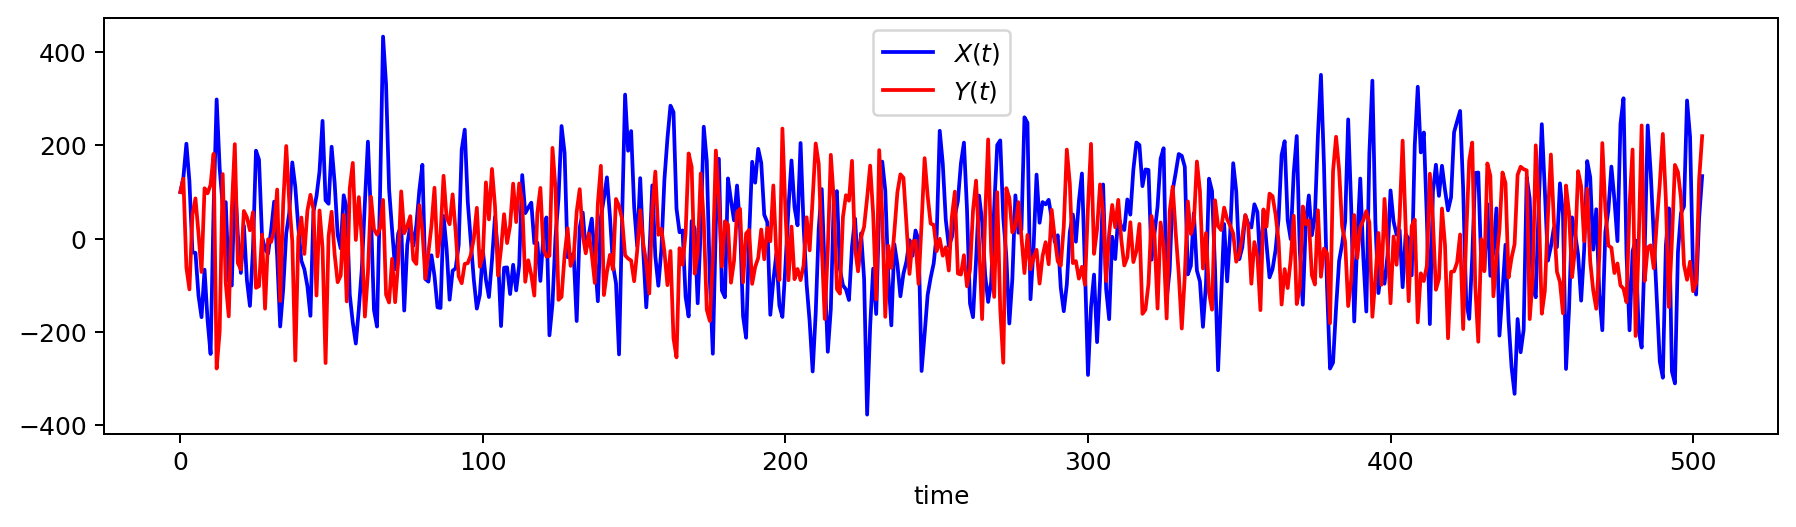

In [10]:
## 2. In case not, differentiate them
#def differentiate(X_t, dt):
## 2. In case not, differentiate them
def diff(X_t, dt):
    N = len(X_t)
    diff_X_t = []
    for i in range(N):
        if i==0:
            diff = (X_t[i+1]-X_t[i])/dt
            diff_X_t.append(diff)
        
        elif i==N-1:
            diff = (X_t[i]-X_t[i-1])/dt
            diff_X_t.append(diff)
            
        else:
            diff_fw = (X_t[i+1]-X_t[i])/dt
            diff_bw = (X_t[i]-X_t[i-1])/dt
            diff = 0.5*(diff_fw+diff_bw)
            diff_X_t.append(diff)
    return diff_X_t

## we use differentiation here
X_t_diff = diff(X_t, Delta_t)
Y_t_diff = diff(Y_t, Delta_t)

adf_test(X_t_diff)
kpss_test(X_t_diff)
adf_test(Y_t_diff)
kpss_test(Y_t_diff)
    
plt.figure(figsize=(12, 3), dpi=180)
plt.plot(t, np.array(X_t_diff)/X_t_diff[0]*100, color='b', label=r'$X(t)$')
plt.plot(t, np.array(Y_t_diff)/Y_t_diff[0]*100, color='r', label=r'$Y(t)$')
plt.xlabel('time')#, plt.ylabel('X(t)')
plt.legend()
#plt.grid(True)
plt.show()   

In [11]:
## 3. perform cross correlation analysis
def CrossCorrelationAnalysis(X, Y, maxlag, dt=1):
    """
    Perform the lagged-cross-correlation analysis between two time series X(t) and Y(t).
    X, Y are two 1-d numpy arrays.
    dt is the time step of the time series (default 1 a.u.) - it could be specified w.r.t a given unit
    """
    
    ### Make sure the two time series are stationary
    ### Performing for example the Augmented Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    result_X, result_Y = adfuller(X), adfuller(Y)
    if (result_X[1] > 0.05 or result_Y[1]>0.05):
        print("Time Series are not stationary")
        return
    else:
        ## we consider X(t+lag), Y(t)
        ## so that for lag<0 X preceeds Y and vice-versa.
        dim = len(X)
        lags = np.arange(-maxlag, maxlag+1, 1)
        lagged_cross_corr = []
        for lag in lags:
            XY = [(X[t+lag], Y[t]) for t in range(dim-np.abs(lag))]
            X_lagged = [el[0] for el in XY]
            Y_lagged = [el[1] for el in XY]
            lagged_cross_corr.append(stats.pearsonr(X_lagged, Y_lagged)[0])
            
        plt.figure(figsize=(3, 3), dpi=180)
        lags_min = [l for l in lags if l<=0]
        lags_maj = [l for l in lags if l>=0]
        lcc_min = [lagged_cross_corr[i] for i in range(len(lags)) if lags[i]<=0]
        lcc_maj = [lagged_cross_corr[i] for i in range(len(lags)) if lags[i]>=0]
        plt.plot(lags_min, lcc_min, lw=3, color='b')
        plt.plot(lags_maj, lcc_maj, lw=3, color='r')
        plt.vlines(0, -1, 1, lw=2, ls='--', color='k')
        plt.xlabel('time lags'), plt.ylabel('lagged-cross-correlation')
        plt.text(-50, 0.8, 'X preceeds Y', color='b')
        plt.text(5, 0.8, 'Y preceeds X', color='r')
        plt.show()

    

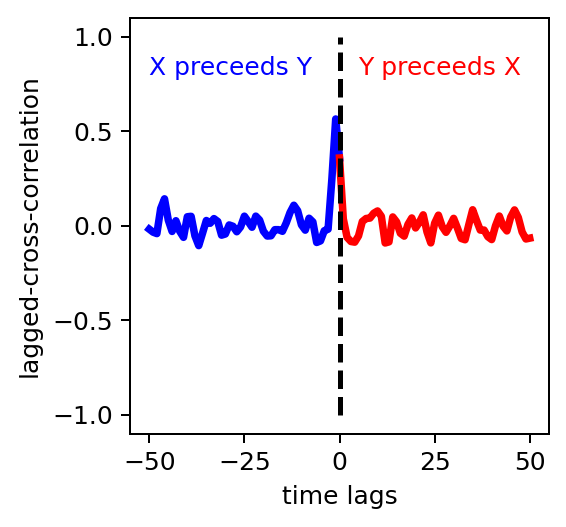

In [12]:
CrossCorrelationAnalysis(X_t_diff, Y_t_diff, maxlag=50, dt=1)

ESERCIZIO 2

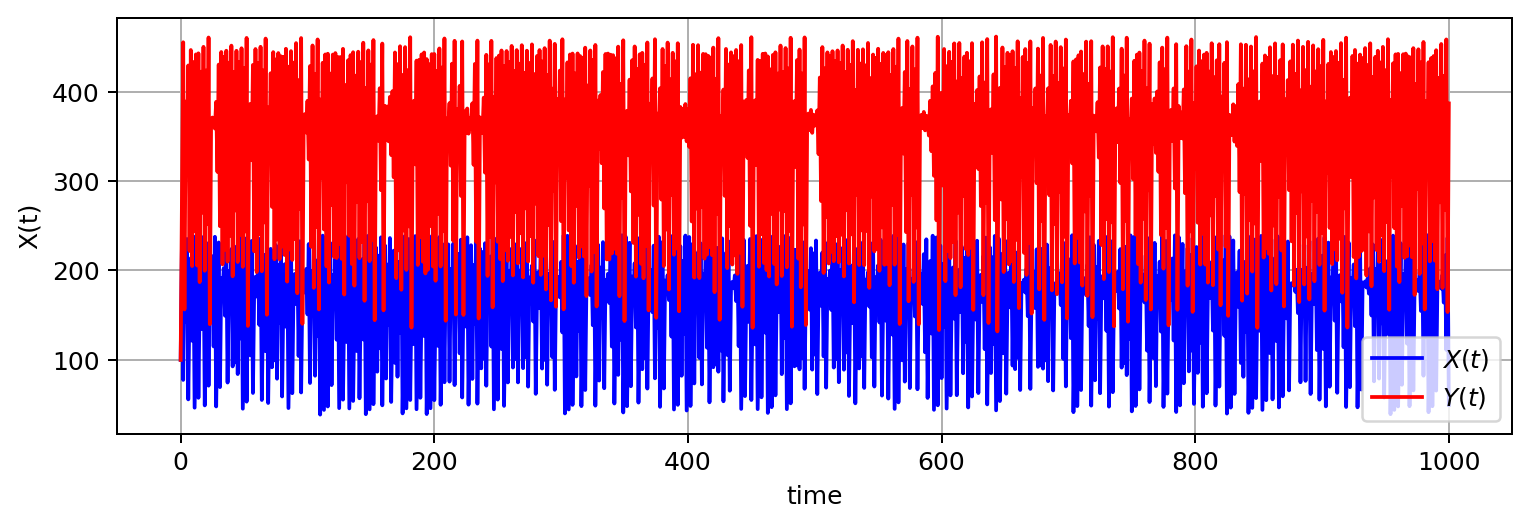

In [13]:

Delta_t = 1 ## days
T_in = 0 
T_fin = 1000 ## 1 year exploration
Nsteps = int((T_fin-T_in)/Delta_t)
t = np.arange(T_in, T_fin+Delta_t, Delta_t)

rx = 3.8
ry = 3.5
b_yx=-0.1
b_xy=-0.02
x0=0.4
y0=0.2

X_t =[]
Y_t = []
X_t.append(x0)
Y_t.append(y0)
for step_i in range(Nsteps+1):
    if step_i==0:
        pass
    else:
        add_value_X = X_t[-1]*(rx-rx*X_t[-1]-b_xy*Y_t[-1])
        add_value_Y = Y_t[-1]*(ry-ry*Y_t[-1]-b_yx*X_t[-1])
        X_t.append(add_value_X)
        Y_t.append(add_value_Y)

plt.figure(figsize=(10, 3), dpi=180)
plt.plot(t, np.array(X_t)/X_t[0]*100, color='b', label=r'$X(t)$')
plt.plot(t, np.array(Y_t)/Y_t[0]*100, color='r', label=r'$Y(t)$')
plt.xlabel('time'), plt.ylabel('X(t)')
plt.legend()
plt.grid(True)
plt.show()

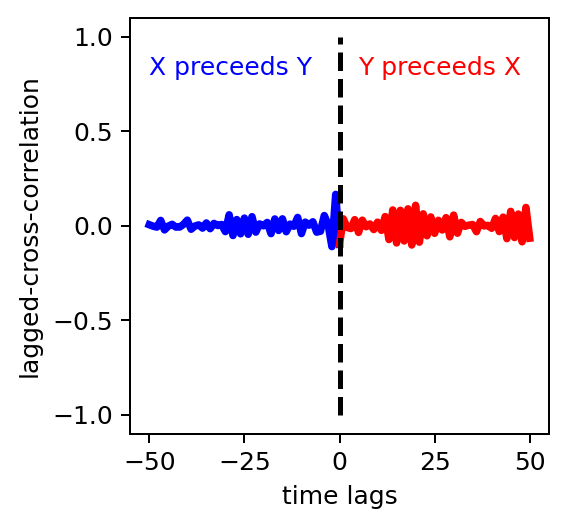

In [14]:
CrossCorrelationAnalysis(X_t,Y_t,50,1)